In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [48]:
# df = pd.read_csv('/kaggle/input/work-from-home-employee-burnout-dataset/work_from_home_burnout_dataset.csv')
df = pd.read_csv('work_from_home_burnout_dataset.csv')
df.head()

,user_id,day_type,work_hours,screen_time_hours,meetings_count,breaks_taken,after_hours_work,sleep_hours,task_completion_rate,burnout_score,burnout_risk
0,1,Weekday,9.59,11.86,4,2,0,7.55,91.2,19.17,Low
1,1,Weekend,7.38,10.33,4,1,0,6.69,82.0,29.70,Low
2,1,Weekend,6.31,8.92,1,2,0,8.87,80.6,32.93,Low
3,1,Weekday,8.34,10.70,4,1,1,8.13,70.0,45.47,Low
4,1,Weekend,6.97,9.83,1,2,0,5.85,67.1,51.61,Low


In [49]:
df.tail()

,user_id,day_type,work_hours,screen_time_hours,meetings_count,breaks_taken,after_hours_work,sleep_hours,task_completion_rate,burnout_score,burnout_risk
1795,180,Weekend,6.33,8.16,0,4,0,5.59,73.5,31.91,Low
1796,180,Weekend,4.70,7.88,0,4,0,6.69,89.8,26.30,Low
1797,180,Weekend,3.92,6.39,2,1,0,6.77,74.6,34.07,Low
1798,180,Weekday,8.93,11.11,2,5,0,8.28,74.6,38.14,Low
1799,180,Weekend,4.38,6.72,0,1,0,7.13,70.7,40.76,Low


In [50]:
df.columns

Index(['user_id', 'day_type', 'work_hours', 'screen_time_hours',
       'meetings_count', 'breaks_taken', 'after_hours_work', 'sleep_hours',
       'task_completion_rate', 'burnout_score', 'burnout_risk'],
      dtype='object')

In [51]:
df.isnull().sum()

user_id                 0
day_type                0
work_hours              0
screen_time_hours       0
meetings_count          0
breaks_taken            0
after_hours_work        0
sleep_hours             0
task_completion_rate    0
burnout_score           0
burnout_risk            0
dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1800 non-null   int64  
 1   day_type              1800 non-null   object 
 2   work_hours            1800 non-null   float64
 3   screen_time_hours     1800 non-null   float64
 4   meetings_count        1800 non-null   int64  
 5   breaks_taken          1800 non-null   int64  
 6   after_hours_work      1800 non-null   int64  
 7   sleep_hours           1800 non-null   float64
 8   task_completion_rate  1800 non-null   float64
 9   burnout_score         1800 non-null   float64
 10  burnout_risk          1800 non-null   object 
dtypes: float64(5), int64(4), object(2)
memory usage: 154.8+ KB


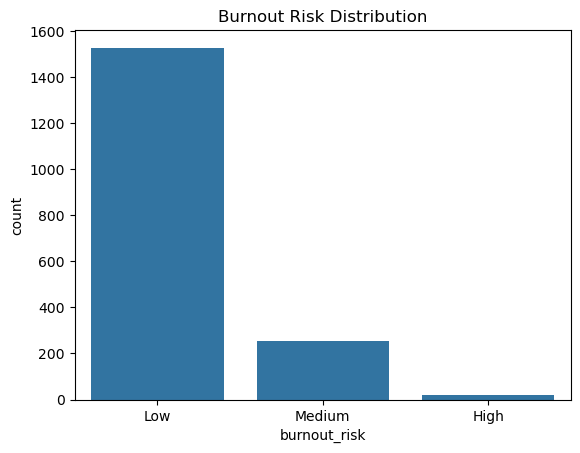

In [53]:
sns.countplot(x='burnout_risk', data=df)
plt.title("Burnout Risk Distribution")
plt.show()

In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [55]:
# num_cols = df.select_dtypes(include=['int64','float64']).columns
# cat_cols = df.select_dtypes(include=['object','category']).columns


In [56]:
# 1. Split X and y FIRST
X = df.drop('burnout_risk', axis=1)
y = df['burnout_risk']

# 2. Identify columns based on X, not df
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns

# 3. Define the preprocessor (it won't look for 'burnout_risk' anymore)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

# 4. Now split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [57]:
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), num_cols),
#         ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
#     ]
# )


In [58]:
# # 1. Define your features (X) and target (y)
# X = df.drop('burnout_risk', axis=1)
# y = df['burnout_risk']

# # 2. Now you can run your split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )

In [59]:
# Fit and transform the training data, transform the test data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [60]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    results[name] = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {results[name]:.4f}")


Logistic Regression Accuracy: 0.9889
Random Forest Accuracy: 1.0000
Decision Tree Accuracy: 0.9972
SVM Accuracy: 0.9667
KNN Accuracy: 0.9444


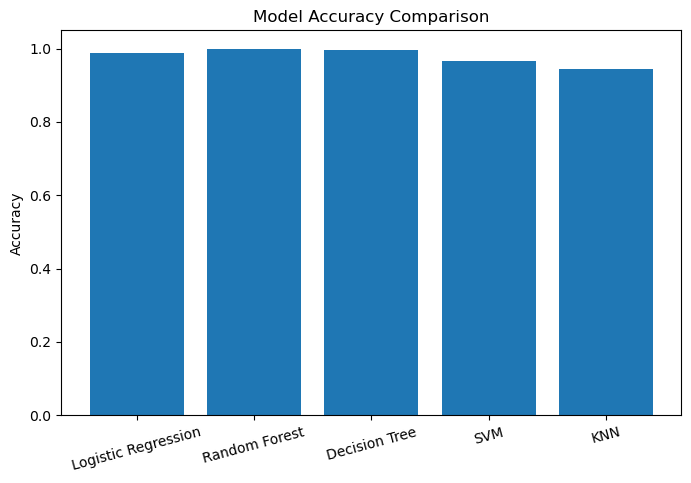

In [66]:
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values())
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=15)
plt.show()


Conclusion:

The results show that all trained models performed well on the dataset, indicating strong predictive patterns in the features. Among them, the Random Forest model achieved the highest accuracy of 100%, making it the best-performing model for burnout risk prediction. Decision Tree and Logistic Regression also delivered excellent performance with accuracies of 99.72% and 98.89%, respectively. SVM and KNN showed comparatively lower accuracy but still produced reliable results. Overall, the Random Forest model proved to be the most accurate and robust, making it the preferred choice for this task.